In [15]:
import requests
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
seasons = np.arange(1889,2020)

In [11]:
game_data = []

for season in seasons:
    parameters = {"year": season, "seasonType": "regular", "team": "Washington"}
    response = requests.get("https://api.collegefootballdata.com/games", params=parameters)
    games = response.json()
    for game in games:
        if (game["home_team"] == "Michigan" or game["away_team"] == "Michigan"):
            game_data.append(game)
    parameters = {"year": season, "seasonType": "postseason", "team": "Washington"}
    response = requests.get("https://api.collegefootballdata.com/games", params=parameters)
    games = response.json()
    for game in games:
        if (game["home_team"] == "Michigan" or game["away_team"] == "Michigan"):
            game_data.append(game)

In [12]:
game_data

[{'id': 31481,
  'season': 1953,
  'week': 2,
  'season_type': 'regular',
  'start_date': '1953-09-26T00:00:00.000Z',
  'start_time_tbd': None,
  'neutral_site': False,
  'conference_game': None,
  'attendance': None,
  'venue_id': None,
  'venue': None,
  'home_id': 130,
  'home_team': 'Michigan',
  'home_conference': 'Big Ten',
  'home_points': 50,
  'home_line_scores': [],
  'home_post_win_prob': None,
  'away_id': 264,
  'away_team': 'Washington',
  'away_conference': 'Pacific',
  'away_points': 0,
  'away_line_scores': [],
  'away_post_win_prob': None,
  'excitement_index': None},
 {'id': 32056,
  'season': 1954,
  'week': 2,
  'season_type': 'regular',
  'start_date': '1954-09-25T00:00:00.000Z',
  'start_time_tbd': None,
  'neutral_site': False,
  'conference_game': None,
  'attendance': None,
  'venue_id': None,
  'venue': None,
  'home_id': 264,
  'home_team': 'Washington',
  'home_conference': 'Pacific',
  'home_points': 0,
  'home_line_scores': [],
  'home_post_win_prob': Non

In [13]:
len(game_data)

12

In [18]:
games = json_normalize(game_data)
games.head()

C:\Users\wwtar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,home_points,home_line_scores,home_post_win_prob,away_id,away_team,away_conference,away_points,away_line_scores,away_post_win_prob,excitement_index
0,31481,1953,2,regular,1953-09-26T00:00:00.000Z,None,False,None,NaN,NaN,...,50,[],None,264,Washington,Pacific,0,[],None,None
1,32056,1954,2,regular,1954-09-25T00:00:00.000Z,None,False,None,NaN,NaN,...,0,[],None,130,Michigan,Big Ten,14,[],None,None
2,41264,1969,3,regular,1969-09-27T00:00:00.000Z,None,False,None,NaN,NaN,...,45,[],None,264,Washington,Pac-8,7,[],None,None
3,41951,1970,5,regular,1970-09-26T00:00:00.000Z,None,False,None,NaN,NaN,...,3,[],None,130,Michigan,Big Ten,17,[],None,None
4,48018,1977,1,postseason,1978-01-02T00:00:00.000Z,None,True,None,NaN,NaN,...,27,[],None,130,Michigan,Big Ten,20,[],None,None


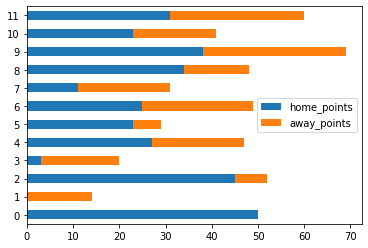